<a href="https://colab.research.google.com/github/abdyraman/canadian-tire/blob/main/newprice_prediction_CanadianTire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# import hvplot.pandas
import numpy as np

Clustering

In [98]:
# Replace the file path with the correct location of the Excel file on your system
file_path = "cantire_df.csv"
# Read the Excel file into a Pandas DataFrame
df_ctire_raw = pd.read_csv(file_path)
df_ctire_raw

,name,new_price,old_price,stars,observations,Savings,discount
0,MASTER Chef Energy Star Compact Refrigerator w...,169.99,249.99,4.4,254,80.00,0.32
1,Sauder 3-Door Wardrobe/Armoire Clothes Storage...,189.99,299.99,3.8,93,110.00,0.37
2,"For Living 30 Pint 2-Speed Dehumidifier, Bucke...",219.99,279.99,4.4,180,60.00,0.21
3,Lagostina 5-Ply Copper Clad Stainless Steel Co...,499.99,2499.99,4.3,127,2000.00,0.80
4,Lagostina Artiste-Clad Hand Hammered Stainless...,299.99,1599.99,4.6,151,1300.00,0.81
...,...,...,...,...,...,...,...
671,Cyclone 80 CFM 1.0 Sone Compact Bath Fan with ...,59.99,69.99,0.0,0,10.00,0.14
672,"Petco Plush Hedgeicorn Dog Toy, Small",3.50,3.99,0.0,0,0.49,0.12
673,Reynolds Kitchens® Unbleached Non-Stick Air Fr...,8.99,9.99,4.0,1,1.00,0.10
674,Bluehive 30 Watt USB-C Fast Charge PD Wall Cha...,19.99,29.99,4.9,8,10.00,0.33


In [100]:
# Set the index of the DataFrame using the specified column
df_ctire_raw.index = df_ctire_raw['name']
# Create a new DataFrame by dropping the specified column
df_ctire_indexed = df_ctire_raw.drop(columns=['name'])
df_ctire_indexed

,new_price,old_price,stars,observations,Savings,discount
name,,,,,,
"MASTER Chef Energy Star Compact Refrigerator with Internal Freezer & Reversible Door for Dorms/Bedroom, 3.3-cu.ft., White",169.99,249.99,4.4,254,80.00,0.32
"Sauder 3-Door Wardrobe/Armoire Clothes Storage Cabinet With Hanger Rod & Shelves, Espresso",189.99,299.99,3.8,93,110.00,0.37
"For Living 30 Pint 2-Speed Dehumidifier, Bucket/Continuous Drain, ENERGY STAR® Certified, White",219.99,279.99,4.4,180,60.00,0.21
"Lagostina 5-Ply Copper Clad Stainless Steel Cookware Set & Oven Safe, 12-pc",499.99,2499.99,4.3,127,2000.00,0.80
"Lagostina Artiste-Clad Hand Hammered Stainless Steel Cookware Set, Oven Safe, 12-pc",299.99,1599.99,4.6,151,1300.00,0.81
...,...,...,...,...,...,...
"Cyclone 80 CFM 1.0 Sone Compact Bath Fan with DC Motor, White",59.99,69.99,0.0,0,10.00,0.14
"Petco Plush Hedgeicorn Dog Toy, Small",3.50,3.99,0.0,0,0.49,0.12
"Reynolds Kitchens® Unbleached Non-Stick Air Fryer Liners, 50-pc",8.99,9.99,4.0,1,1.00,0.10


In [93]:
# Create a DataFrame with the scaled data
scaler = StandardScaler()
# Extract the columns you want to scale
columns_to_scale = df_ctire_indexed[['new_price','old_price','stars','observations','Savings','discount']]
scaled_data = scaler.fit_transform(columns_to_scale)

In [94]:
# Create a DataFrame with the scaled data
df_ctire_scaled = pd.DataFrame(
    scaled_data,
    columns=['new_price','old_price','stars','observations','Savings','discount']
)
# Copy the occupation group names from the original data
df_ctire_scaled["name"] = df_ctire_indexed.index
# Set the "Job areas" column as the index
df_ctire_scaled = df_ctire_scaled.set_index("name")
# Drop the row at index label 0
df_ctire_scaled = df_ctire_scaled.drop(df_ctire_scaled.index[0])
df_ctire_scaled

,new_price,old_price,stars,observations,Savings,discount
name,,,,,,
"Sauder 3-Door Wardrobe/Armoire Clothes Storage Cabinet With Hanger Rod & Shelves, Espresso",1.422428,0.994332,0.020982,-0.148669,0.438098,0.141555
"For Living 30 Pint 2-Speed Dehumidifier, Bucket/Continuous Drain, ENERGY STAR® Certified, White",1.757772,0.891143,0.452978,-0.066575,0.103523,0.102618
"Lagostina 5-Ply Copper Clad Stainless Steel Cookware Set & Oven Safe, 12-pc",4.887656,12.345068,0.380979,-0.116586,13.085045,0.246200
"Lagostina Artiste-Clad Hand Hammered Stainless Steel Cookware Set, Oven Safe, 12-pc",2.652025,7.701585,0.596977,-0.093940,8.400990,0.248634
"For Living 6-ft Portable Indoor/Outdoor Plastic & Metal Folding Table with Handle, White",-0.030733,-0.140742,0.596977,0.613760,-0.164137,0.112352
...,...,...,...,...,...,...
"Cyclone 80 CFM 1.0 Sone Compact Bath Fan with DC Motor, White",-0.030733,-0.192336,-2.714993,-0.236423,-0.231052,0.085583
"Petco Plush Hedgeicorn Dog Toy, Small",-0.662187,-0.532858,-2.714993,-0.236423,-0.294688,0.080715
"Reynolds Kitchens® Unbleached Non-Stick Air Fryer Liners, 50-pc",-0.600819,-0.501901,0.164981,-0.235480,-0.291276,0.075848


In [95]:
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch

In [96]:
# Create a list to store inertia values and the values of k
inertia = []
# Create a list to set the range of k values to test
k = list(range(1, 11))

In [9]:
# Create a for loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the "customers_df" DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_ctire_scaled)
    inertia.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [10]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,4053.738875
1,2,3216.307505
2,3,2633.513159
3,4,2106.343637
4,5,1632.206678


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

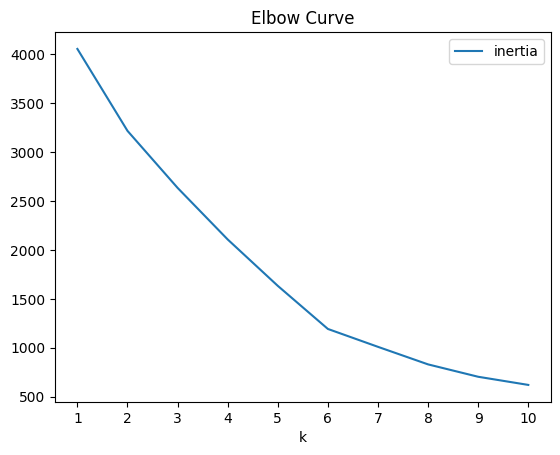

In [11]:
# Plot the DataFrame to identify the optimal value for k
df_elbow.plot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

Segment the data with K-means using the optimal number of clusters, AgglomerativeClustering and Birch

In [12]:
# Define the model with optimal number of clusters
model = KMeans(n_clusters=6, random_state=1)
# Fit the model
model.fit(df_ctire_scaled)
# Make predictions
kmeans_predictions = model.predict(df_ctire_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
agglo_model = AgglomerativeClustering(n_clusters=6)
agglo_predictions = agglo_model.fit_predict(df_ctire_scaled)

In [14]:
birch_model = Birch(n_clusters=6)
birch_model.fit(df_ctire_scaled)
birch_predictions = birch_model.predict(df_ctire_scaled)

In [16]:
# Create a copy of the customers_df DataFrame
ctire_predictions_df = df_ctire_scaled.copy()
# Add class columns with the labels to the new DataFrame
ctire_predictions_df["kmeans-segments"] = kmeans_predictions
ctire_predictions_df["agglomerative-segments"] = agglo_predictions
ctire_predictions_df["birch-segments"] = birch_predictions


In [20]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 33.8 MB/s eta 0:00:00


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
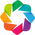

:Scatter   [discount]   (old_price,kmeans-segments)

In [40]:
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')

# Assuming women_predictions_df is your DataFrame containing the data

# Create the scatter plot using hvplot
scatter_plot = ctire_predictions_df.hvplot.scatter(
    x='discount',
    y='old_price',
    c="kmeans-segments",
    cmap='rainbow',
    alpha=0.7,
    colorbar=True,
    ylabel="Old price",
    clim=(ctire_predictions_df["kmeans-segments"].min(), ctire_predictions_df["kmeans-segments"].max()),
    width=600,
    height=400,
    hover_cols=["kmeans-segments", "additional-column-1", "additional-column-2"],  # Add columns you want to display in tooltips
    tools=['hover'],  # Show only hover tool for tooltips
)

# Show the scatter plot
scatter_plot

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
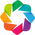

:Scatter   [discount]   (old_price,agglomerative-segments)

In [41]:
hv.extension('bokeh')
# Create the scatter plot using hvplot
scatter_plot = ctire_predictions_df.hvplot.scatter(
    x='discount',
    y='old_price',
    c="agglomerative-segments",
    cmap='rainbow',
    alpha=0.7,
    colorbar=True,
    ylabel="Old price",
    clim=(ctire_predictions_df["agglomerative-segments"].min(), ctire_predictions_df["agglomerative-segments"].max()),
    width=600,
    height=400,
    hover_cols=["agglomerative-segments", "additional-column-1", "additional-column-2"],  # Add columns you want to display in tooltips
    tools=['hover'],  # Show only hover tool for tooltips
)

# Show the scatter plot
scatter_plot

The best model

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
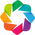

:Scatter   [discount]   (old_price,birch-segments)

In [42]:
hv.extension('bokeh')
# Create the scatter plot using hvplot
scatter_plot = ctire_predictions_df.hvplot.scatter(
    x='discount',
    y='old_price',
    c="birch-segments",
    cmap='rainbow',
    alpha=0.7,
    colorbar=True,
    ylabel="Old price",
    clim=(ctire_predictions_df["birch-segments"].min(), ctire_predictions_df["birch-segments"].max()),
    width=600,
    height=400,
    hover_cols=["birch-segments", "additional-column-1", "additional-column-2"],  # Add columns you want to display in tooltips
    tools=['hover'],  # Show only hover tool for tooltips
)

# Show the scatter plot
scatter_plot

Use the calculate PCA DataFrame in Step 6 to create a new DataFrame called, then add an additional column to the DataFrame that contains the tickers from the originalDataFrame.

In [17]:
# Create the PCA model instance where n_components=2
pca = PCA(n_components=6)

In [18]:
# Fit the df_stocks_scaled data to the PCA
ctire_pca_data = pca.fit_transform(df_ctire_scaled)

In [19]:
# Calculate the explained variance
pca.explained_variance_ratio_

array([3.77821173e-01, 2.09929571e-01, 1.83131760e-01, 1.47570367e-01,
       8.15471291e-02, 1.36929304e-32])


The pca.explained_variance_ratio_ attribute in scikit-learn's PCA (Principal Component Analysis) instance represents the proportion of variance explained by each of the selected principal components.

In the provided array:

The first element (0.377821173) indicates that the first principal component explains approximately 37.78% of the total variance in the data.

The second element (0.209929571) indicates that the second principal component explains approximately 20.99% of the total variance.

The third element (0.183131760) indicates that the third principal component explains approximately 18.31% of the total variance, and so on for the subsequent components.

8% and 1%

In [38]:
import numpy as np
# Fit the PCA model to your data
pca.fit(df_ctire_scaled)
# Get the loadings (coefficients) for each feature
loadings = pca.components_
# Determine the absolute magnitude of the loadings
absolute_loadings = np.abs(loadings)
# Find the most important feature for each component
most_important_features = np.argmax(absolute_loadings, axis=1)
# Print the most important features for each component
for component, feature_idx in enumerate(most_important_features):
    feature_name = df_ctire_scaled.columns[feature_idx]
    print(f"Component {component+1}: Most important feature is {feature_name}")

Component 1: Most important feature is old_price
Component 2: Most important feature is discount
Component 3: Most important feature is stars
Component 4: Most important feature is observations
Component 5: Most important feature is new_price
Component 6: Most important feature is old_price


Linear regression on new price

In [89]:
# Import numpy and pandas package
import pandas as pd
import numpy as np
# Data visualization
from matplotlib import pyplot as plot
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
df_ctire_indexed = df_ctire_raw.drop(columns=['name'])
df_ctire_indexed

,new_price,old_price,stars,observations,Savings,discount
name,,,,,,
"MASTER Chef Energy Star Compact Refrigerator with Internal Freezer & Reversible Door for Dorms/Bedroom, 3.3-cu.ft., White",169.99,249.99,4.4,254,80.00,0.32
"Sauder 3-Door Wardrobe/Armoire Clothes Storage Cabinet With Hanger Rod & Shelves, Espresso",189.99,299.99,3.8,93,110.00,0.37
"For Living 30 Pint 2-Speed Dehumidifier, Bucket/Continuous Drain, ENERGY STAR® Certified, White",219.99,279.99,4.4,180,60.00,0.21
"Lagostina 5-Ply Copper Clad Stainless Steel Cookware Set & Oven Safe, 12-pc",499.99,2499.99,4.3,127,2000.00,0.80
"Lagostina Artiste-Clad Hand Hammered Stainless Steel Cookware Set, Oven Safe, 12-pc",299.99,1599.99,4.6,151,1300.00,0.81
...,...,...,...,...,...,...
"Cyclone 80 CFM 1.0 Sone Compact Bath Fan with DC Motor, White",59.99,69.99,0.0,0,10.00,0.14
"Petco Plush Hedgeicorn Dog Toy, Small",3.50,3.99,0.0,0,0.49,0.12
"Reynolds Kitchens® Unbleached Non-Stick Air Fryer Liners, 50-pc",8.99,9.99,4.0,1,1.00,0.10


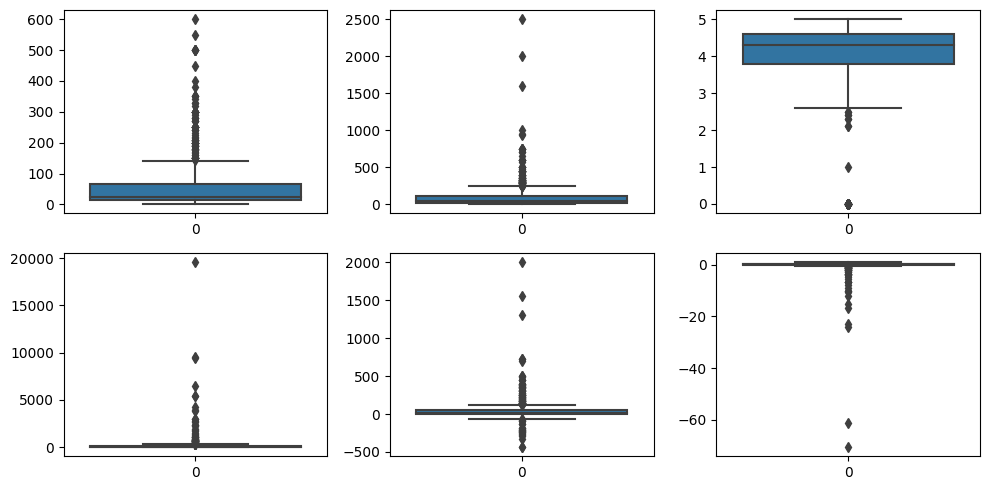

In [106]:
def detectOutliers():
    fig, axs = plot.subplots(2,3, figsize = (10,5))
    plt1 = sns.boxplot(df_ctire_indexed['new_price'], ax = axs[0,0])
    plt2 = sns.boxplot(df_ctire_indexed['old_price'], ax = axs[0,1])
    plt3 = sns.boxplot(df_ctire_indexed['stars'], ax = axs[0,2])
    plt1 = sns.boxplot(df_ctire_indexed['observations'], ax = axs[1,0])
    plt2 = sns.boxplot(df_ctire_indexed['Savings'], ax = axs[1,1])
    plt3 = sns.boxplot(df_ctire_indexed['discount'], ax = axs[1,2])
    plot.tight_layout()
detectOutliers()

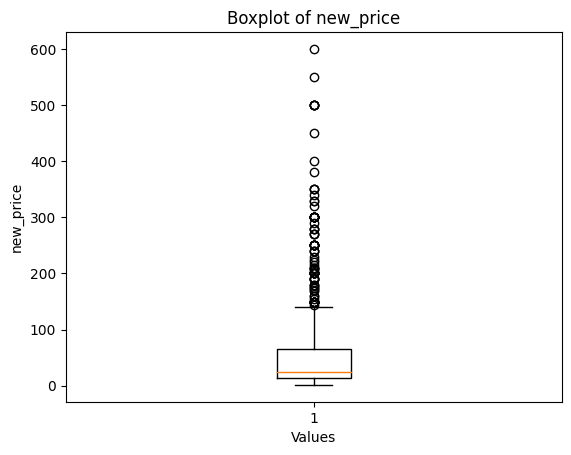

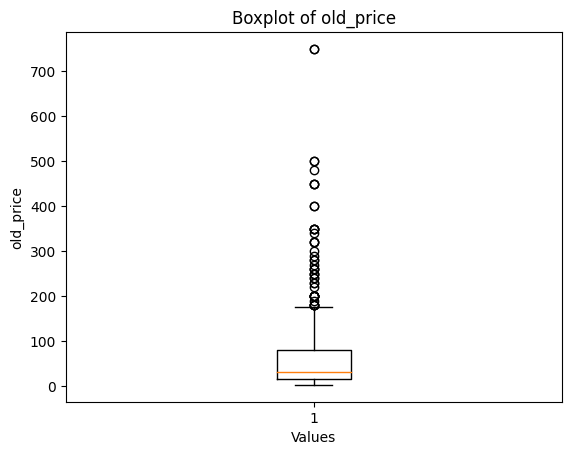

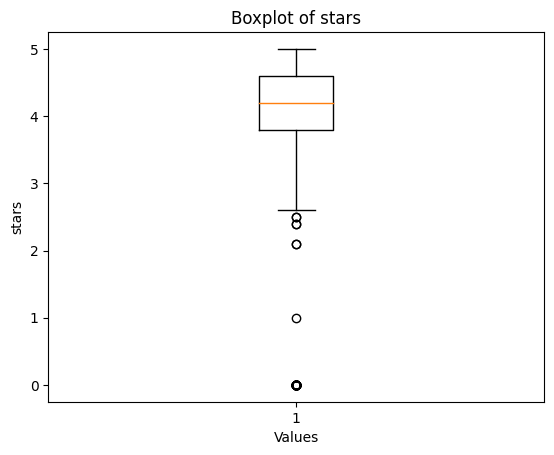

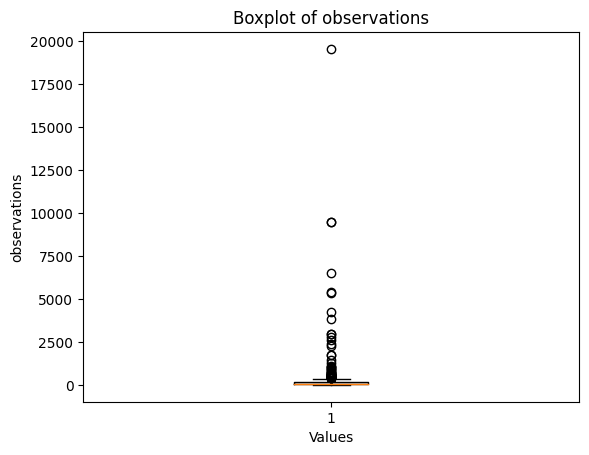

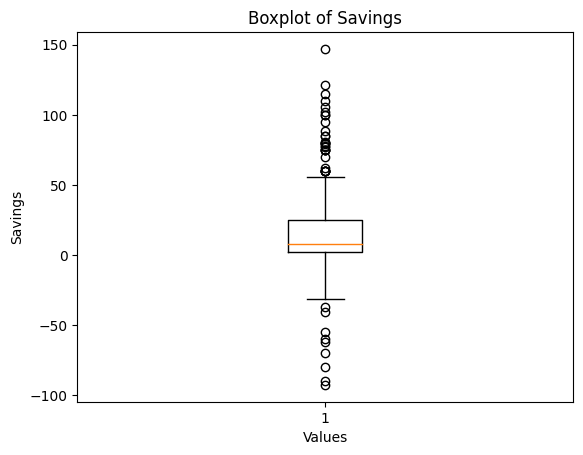

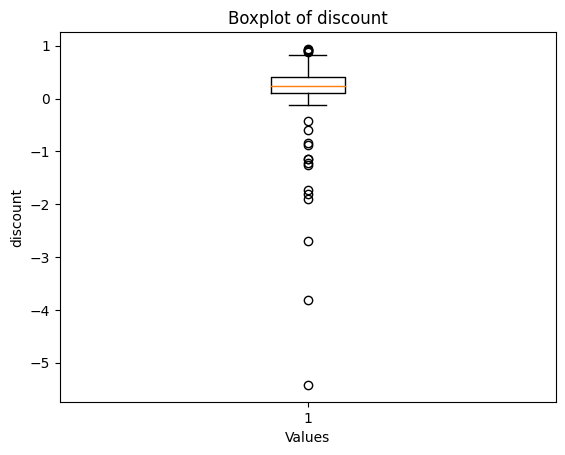

In [122]:
def filter_outliers(df, column_name):
    # Plot a boxplot to visualize the distribution and outliers
    plt.boxplot(df[column_name])
    plt.xlabel('Values')
    plt.ylabel(column_name)
    plt.title(f'Boxplot of {column_name}')
    plt.show()

    # Calculate the first and third quartiles (Q1 and Q3) and the interquartile range (IQR)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Filter the DataFrame to remove outliers
    df_filtered = df[(df[column_name] >= Q1 - 1.5 * IQR) & (df[column_name] <= Q3 + 1.5 * IQR)]
    return df_filtered

# Call the function to filter outliers for the columns
df_ctire_filtered = filter_outliers(df_ctire_indexed, 'new_price')
df_ctire_filtered = filter_outliers(df_ctire_filtered, 'old_price')
df_ctire_filtered = filter_outliers(df_ctire_filtered, 'stars')
df_ctire_filtered = filter_outliers(df_ctire_filtered, 'observations')
df_ctire_filtered = filter_outliers(df_ctire_filtered, 'Savings')
df_ctire_filtered = filter_outliers(df_ctire_filtered, 'discount')

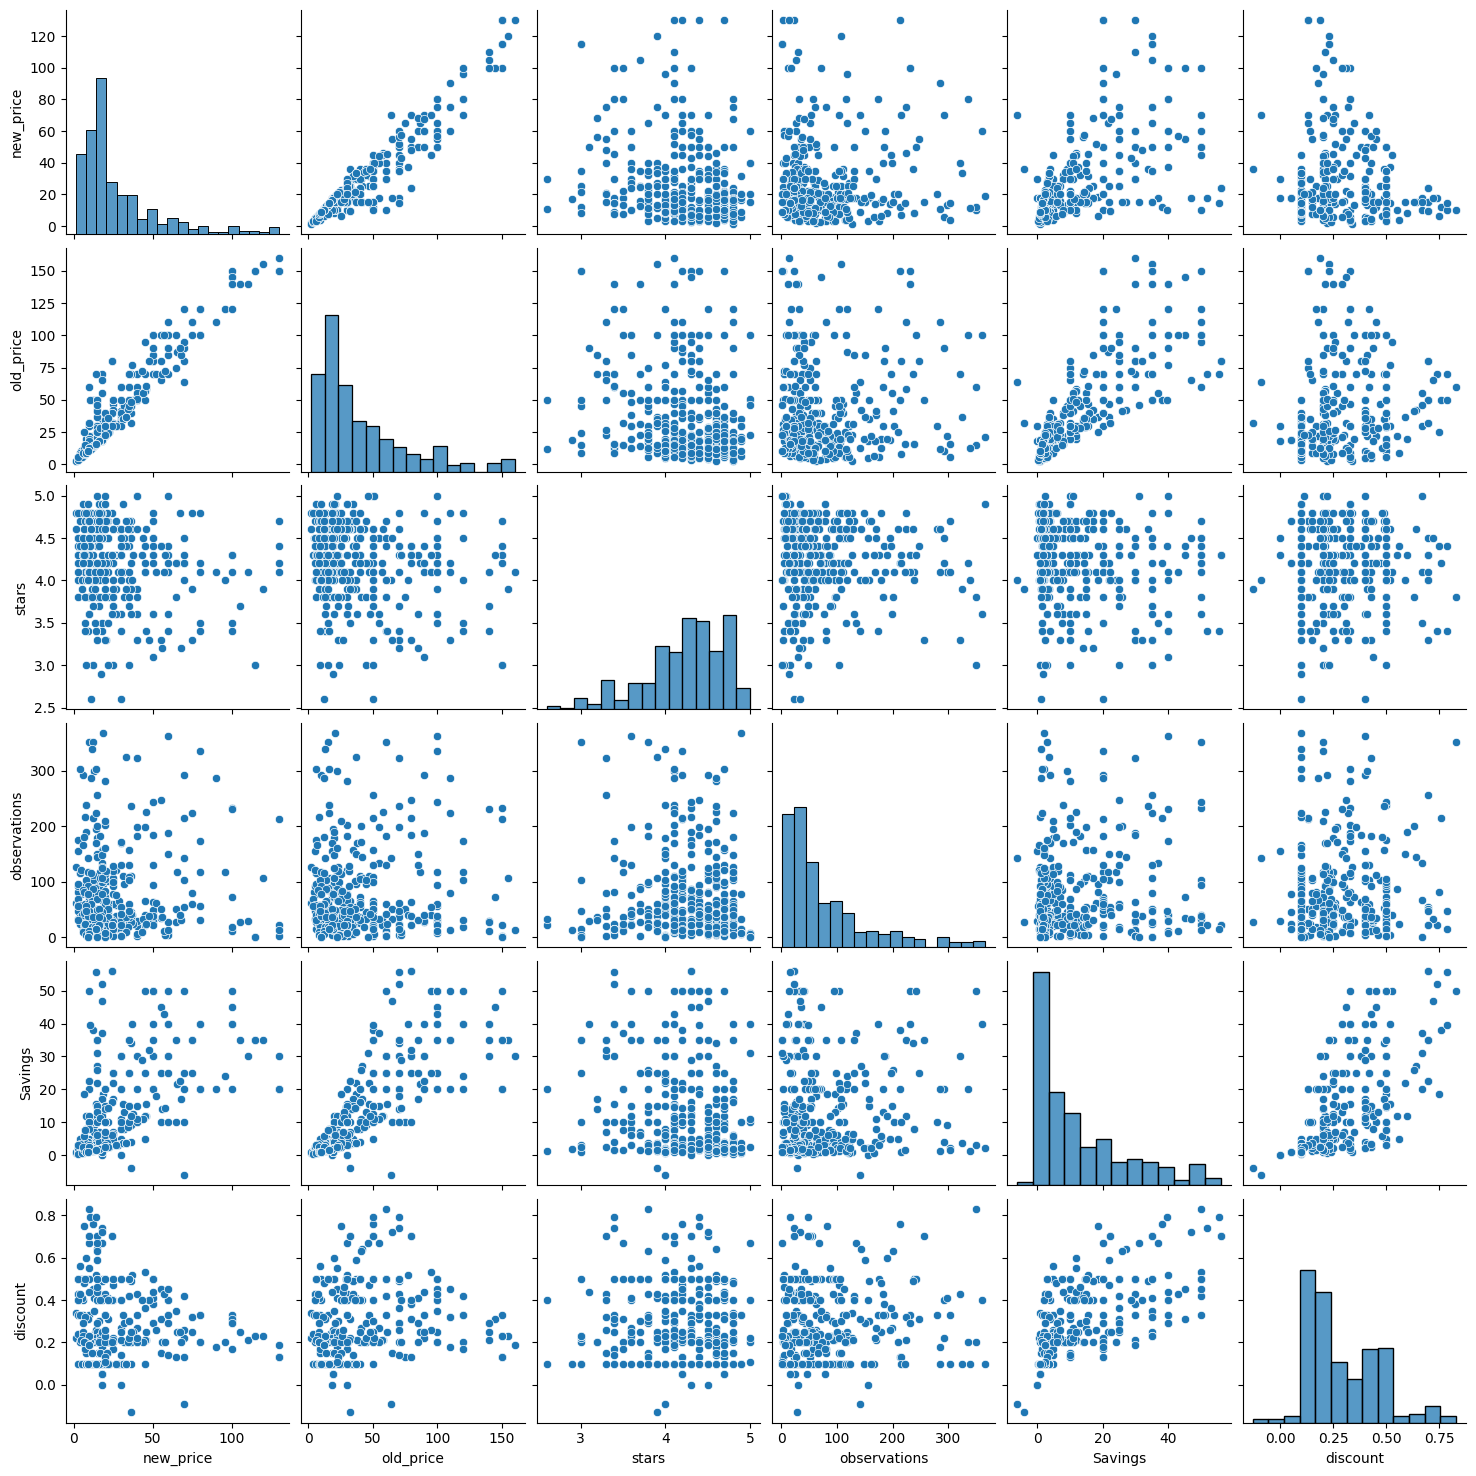

In [123]:
sns.pairplot(df_ctire_filtered)
plot.show()

In [128]:
Y = df_ctire_filtered.new_price
# includes the fields other than prices
X = df_ctire_filtered.iloc[:,1:]

In [129]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
def preprocessing(X):
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    variables = X_scaled
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
    vif["Features"] = X.columns
    print(vif)

In [130]:
preprocessing(X)

         VIF      Features
0   9.850022     old_price
1   5.747289         stars
2   1.968958  observations
3  23.023912       Savings
4  16.346249      discount


As a thumb rule, a VIF value greater than 5 means very severe multicollinearity. From the above savings and discount having severe collinearity.

In [131]:
X.drop(['Savings','discount'], axis=1, inplace=True)
preprocessing(X)

        VIF      Features
0  1.871303     old_price
1  2.384158         stars
2  1.890374  observations


In [132]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=355)

In [133]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [134]:
y_predict = regression.predict(x_test)

In [136]:
import statsmodels.api as sms
model_1 = sms.OLS(y_train, x_train).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              new_price   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              1578.
Date:                Thu, 21 Sep 2023   Prob (F-statistic):                   1.70e-169
Time:                        22:09:53   Log-Likelihood:                         -952.33
No. Observations:                 270   AIC:                                      1911.
Df Residuals:                     267   BIC:                                      1921.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
old_price        0.6646      0.015     44.863      0.000       0.635       0.694
stars            0.0793      0.209      0.380      0.704      -0.331       0.490
observations     0.0016      0.007      0.240      0.810      -0.011       0.015
==============================================================================
Omnibus:                       58.195   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.347
Skew:                          -0.934   Prob(JB):                     6.20e-38
Kurtosis:                       6.427   Cond. No.                         46.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

NameError: ignored

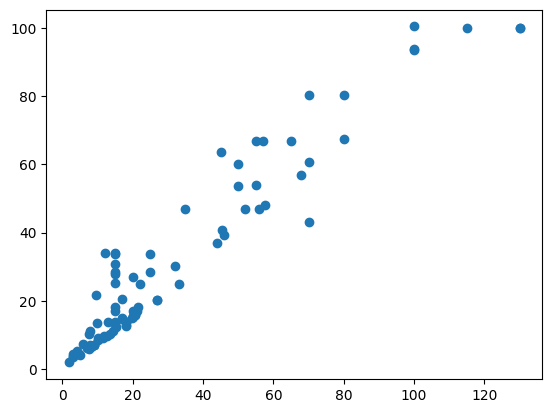

In [138]:
plot.scatter(y_test,y_predict)
fig.suptitle('y_test vs y_pred', fontsize=20)
plot.xlabel('y_test', fontsize=18)
plot.ylabel('y_pred', fontsize=16)